In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#for displaying the pipeline
from sklearn import set_config
set_config(display='diagram')

import warnings
warnings.filterwarnings("ignore")

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [152]:
df=pd.read_excel("Flight Data.xlsx")

In [153]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Exploratory Data Analysis :-

In [154]:
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [155]:
df.shape

(10683, 11)

In [156]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [157]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [158]:
df.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [159]:
df["Additional_Info"].value_counts().values

array([8345, 1982,  320,   19,    7,    4,    3,    1,    1,    1],
      dtype=int64)

In [160]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [161]:
df.Arrival_Time.value_counts().sample

<bound method NDFrame.sample of 19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64>

In [162]:
df.Dep_Time.value_counts().sample

<bound method NDFrame.sample of 18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64>

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [164]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [165]:
df.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [166]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [167]:
df.notnull().sum()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [168]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [169]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [170]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])

In [171]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [172]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [176]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [177]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [178]:
[features for features in df.columns if df[features].isnull().sum()>0]


['Route', 'Total_Stops']

In [181]:
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [182]:
df=df.replace({'Additional_Info' : { "No Info" : "No info"}})
df=df.replace({'Destination' : { "Delhi" : "New Delhi"}})
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,New Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [183]:
df.tail(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10663,Jet Airways,2019-06-06,Delhi,Cochin,DEL → JAI → BOM → COK,19:30,12:35 07 Jun,17h 5m,2 stops,In-flight meal not included,11733
10664,IndiGo,2019-09-04,Banglore,New Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823
10665,IndiGo,2019-04-27,Kolkata,Banglore,CCU → BLR,15:15,17:45,2h 30m,non-stop,No info,4804
10666,Jet Airways,2019-12-06,Delhi,Cochin,DEL → BOM → COK,18:15,19:00 13 Jun,24h 45m,1 stop,In-flight meal not included,10262
10667,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,22:55,20:20 13 Mar,21h 25m,1 stop,In-flight meal not included,11087
10668,Jet Airways,2019-09-05,Delhi,Cochin,DEL → JDH → BOM → COK,11:40,19:00,7h 20m,2 stops,No info,21219
10669,Air India,2019-06-15,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,9929
10670,Air India,2019-12-05,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,23:15,17h 25m,2 stops,No info,11411
10671,Air India,2019-06-06,Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 20m,non-stop,No info,3100
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [184]:
df["Additional_Info"].isnull().sum()

0

In [185]:
df["Additional_Info"].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [186]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [187]:
df["Additional_Info"].describe()

count       10683
unique          9
top       No info
freq         8348
Name: Additional_Info, dtype: object

In [188]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Data Visualisation

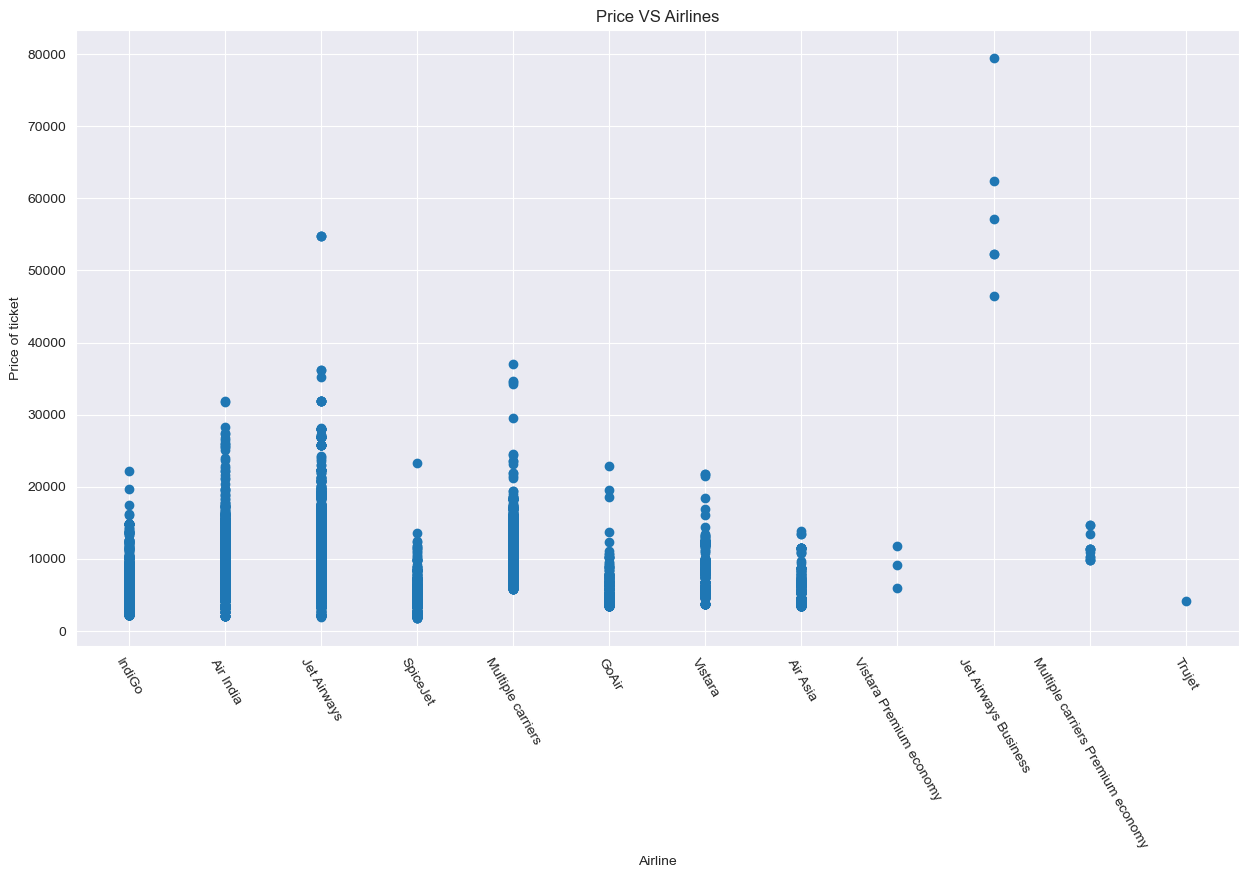

In [192]:
plt.figure(figsize = (15,8))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])    #scatter plot
# plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket');
plt.xticks(rotation = -60);

 ## Observation 
<font size=3>Jet Airways Business have the highest prices
while Truejet have among the lowest prices</font>

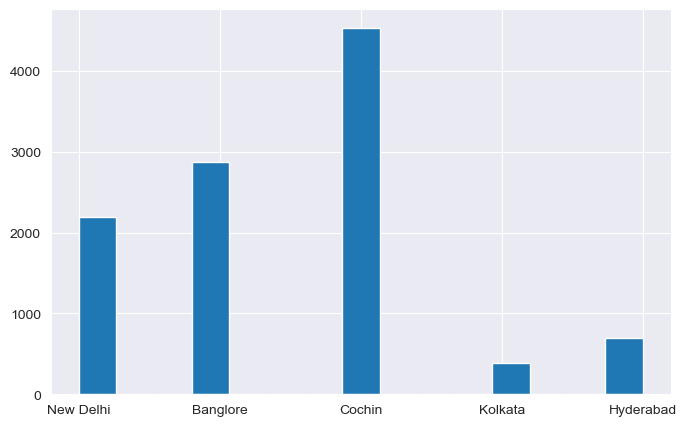

In [194]:
plt.figure(figsize = (8,5))
plt.hist(df.Destination, bins=15);

<span style="color:violet"><font size=4.5> Observation :</font></span><br><br>
<font size=3>Cochin is the most visited place while Kolkata is the least visited</font>

In [195]:
flight_names=df.Airline.value_counts().index
flight_names

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object')

In [196]:
flight=df.Airline.value_counts().values
flight

array([3849, 2053, 1752, 1196,  818,  479,  319,  194,   13,    6,    3,
          1], dtype=int64)

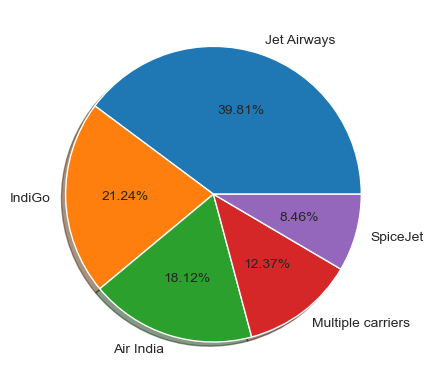

In [197]:
plt.pie(flight[:5],labels=flight_names[:5],autopct='%.2f%%', shadow=True);

## Observation
<font size=3>Jet Airways has the maximum no of flights across the country, followed by IndiGo and then Air India</font>

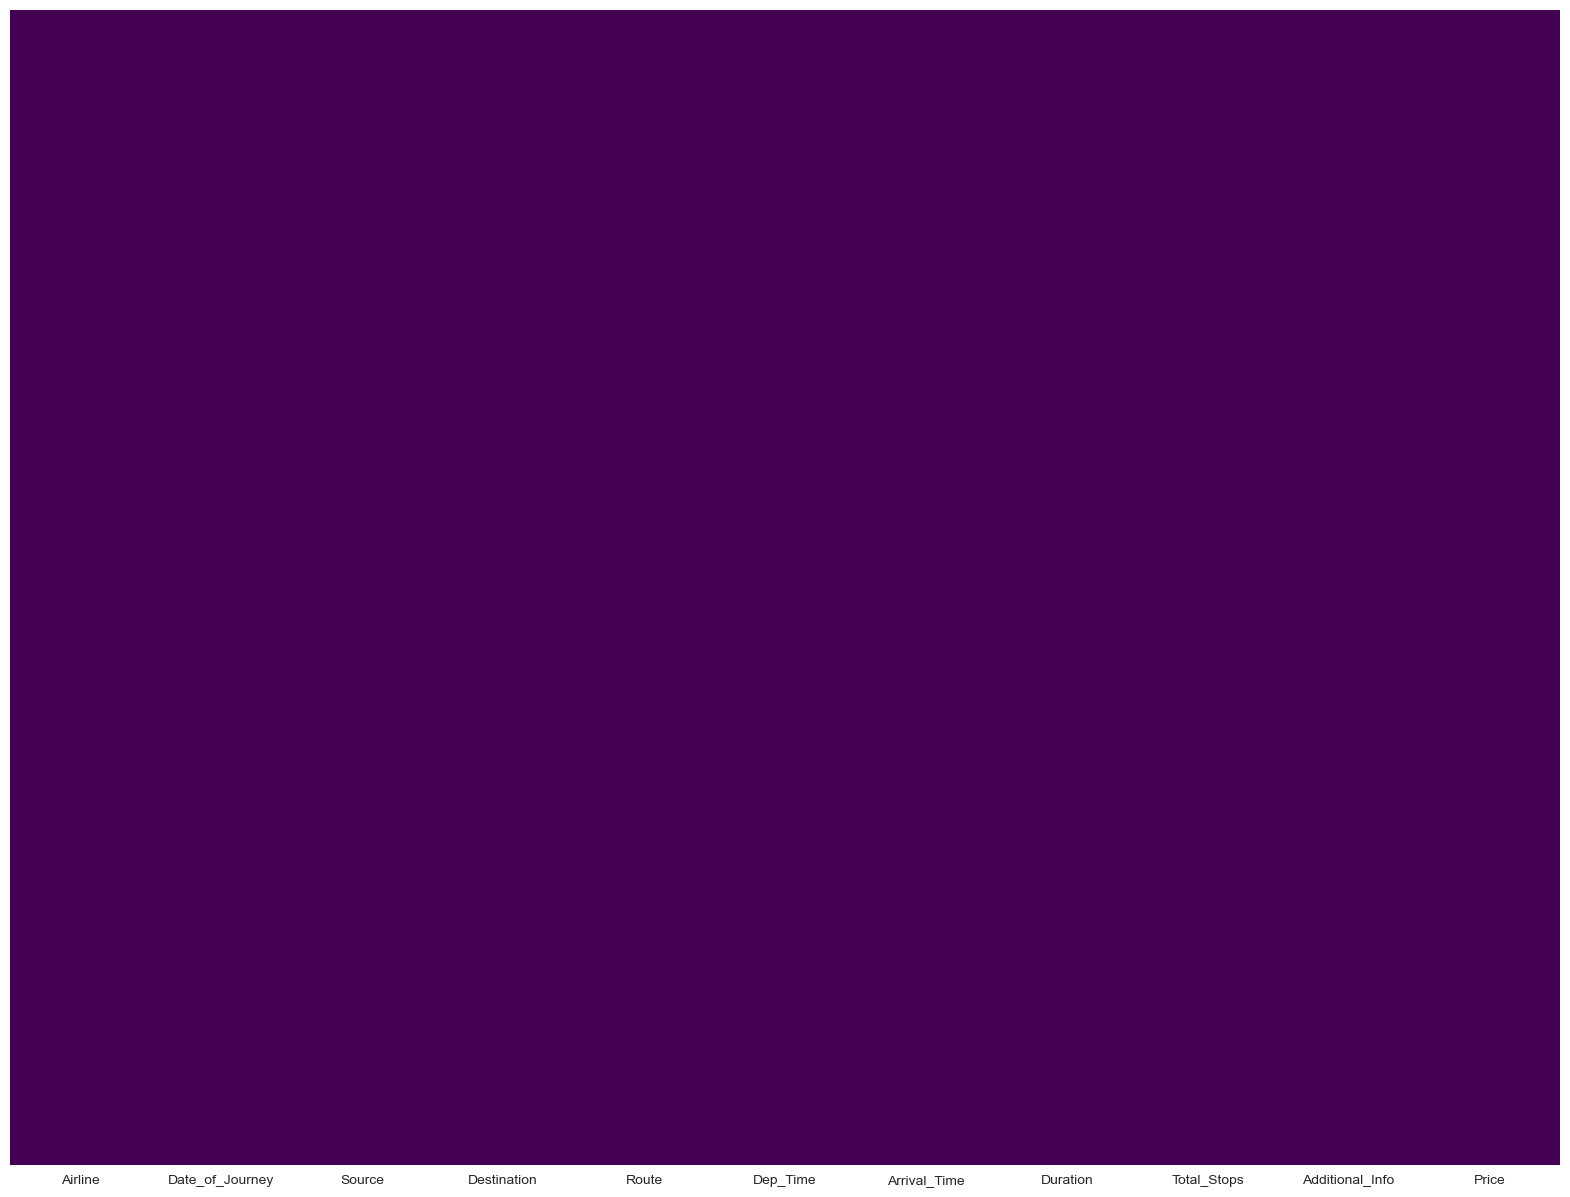

In [198]:
plt.figure(figsize=(20,15))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

# Handling the missing values :-

In [203]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [204]:
df.dropna(subset='Route', axis=0, inplace=True)
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<span style="color:yellow"><font size=5.5em><b> Feature Engineering:</b></font></span>

In [205]:
df["Journey_day"]=df["Date_of_Journey"].dt.day
df["Journey_month"]=df["Date_of_Journey"].dt.month
df["Journey_year"]=df["Date_of_Journey"].dt.year

In [206]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,2019-04-27,Banglore,New Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,2019


In [207]:
df.drop("Date_of_Journey", axis=1 ,inplace=True)

In [208]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,New Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,2019


In [209]:
df["Dep_Time"]=pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"])

In [210]:
df.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_day                 int64
Journey_month               int64
Journey_year                int64
dtype: object

In [211]:
df["Departure_hr"]=df["Dep_Time"].dt.hour.astype(int)
df["Departure_min"]=df["Dep_Time"].dt.minute.astype(int)
df["Arrival_hr"]=df["Arrival_Time"].dt.hour.astype(int)
df["Arrival_min"]=df["Arrival_Time"].dt.minute.astype(int)

In [212]:
df.drop("Dep_Time", axis=1 ,inplace=True)
df.drop("Arrival_Time", axis=1 ,inplace=True)

In [213]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,New Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10


In [214]:
df["Journey_month"].describe()

count    10682.000000
mean         5.534731
std          2.987626
min          1.000000
25%          3.000000
50%          5.000000
75%          6.000000
max         12.000000
Name: Journey_month, dtype: float64

In [215]:
df["Duration_hr"]=df["Duration"].str.split("h").str[0]
df["Duration_min"]=df["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [216]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,New Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,8,20,11,20,3,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10,2,40


In [217]:
df["Duration_hr"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [218]:
df.loc[df["Duration_hr"]=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,3,6,2019,16,50,16,55,5m,NaN


In [219]:
df[df["Duration_hr"]=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,3,6,2019,16,50,16,55,5m,NaN


In [220]:
df.drop(df[df["Duration_hr"]=='5m'].index,inplace=True)

In [221]:
df["Duration_hr"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [222]:
df["Duration_hr"]=df["Duration_hr"].astype(int)

In [223]:
df=df.replace({"Duration_min" : {np.nan :'0'}})

In [224]:
df["Duration_min"].isnull().values

array([False, False, False, ..., False, False, False])

In [225]:
df["Duration_min"]=df["Duration_min"].astype(int)

In [226]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_day         int64
Journey_month       int64
Journey_year        int64
Departure_hr        int32
Departure_min       int32
Arrival_hr          int32
Arrival_min         int32
Duration_hr         int32
Duration_min        int32
dtype: object

In [227]:
df.drop("Route", axis=1 ,inplace=True)

In [228]:
df.sample(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
5295,Jet Airways,Delhi,Cochin,19h 25m,1 stop,In-flight meal not included,12898,27,5,2019,9,0,4,25,19,25
1777,IndiGo,Kolkata,Banglore,2h 45m,non-stop,No info,4804,27,4,2019,9,35,12,20,2,45
3892,IndiGo,Delhi,Cochin,5h 15m,1 stop,No info,6582,6,1,2019,7,15,12,30,5,15


In [229]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [230]:
df=df.replace({'Total_Stops' : {'non-stop':'0'}})

In [231]:
df['Total_Stops']=df['Total_Stops'].str.split(" ").str[0]

In [232]:
df['Total_Stops']=df['Total_Stops'].astype(int)

In [233]:
df.dtypes

Airline            object
Source             object
Destination        object
Duration           object
Total_Stops         int32
Additional_Info    object
Price               int64
Journey_day         int64
Journey_month       int64
Journey_year        int64
Departure_hr        int32
Departure_min       int32
Arrival_hr          int32
Arrival_min         int32
Duration_hr         int32
Duration_min        int32
dtype: object

In [234]:
df.drop("Duration", axis=1 ,inplace=True)

In [235]:
df['Journey_year'].unique()

array([2019], dtype=int64)

In [236]:
df['Journey_year']=2023

In [237]:
df.sample(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
2161,IndiGo,Banglore,New Delhi,1,No info,10231,3,9,2023,16,50,21,35,4,45
10638,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,7832,21,3,2023,21,25,11,25,14,0
6134,Jet Airways,Delhi,Cochin,1,In-flight meal not included,10262,24,6,2023,15,0,12,35,21,35


<span style="color:yellow"><font size=5.5em><b>Data Visualisation :</b></font></span>

### Month of Journey Vs No of flights:

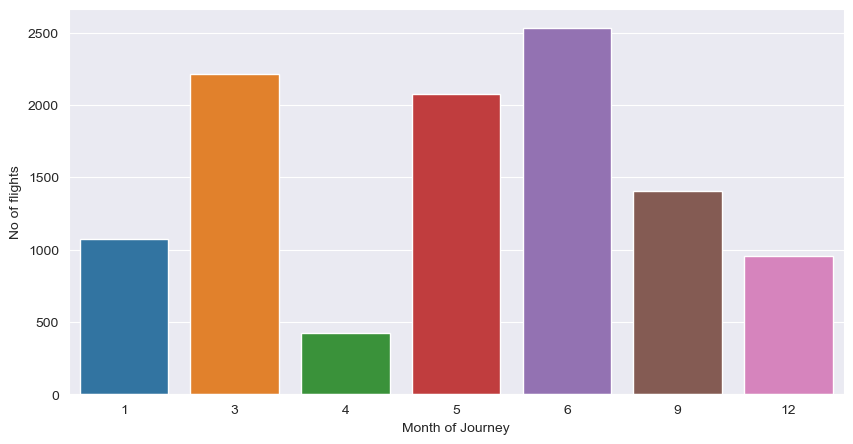

In [238]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Journey_month', data = df)
plt.xlabel("Month of Journey")
plt.ylabel("No of flights");

## Observation:
<font size=4>June sees the largest number of flights while April the least</font>

In [239]:
years=df["Journey_year"].unique()
print(years)

[2023]


### Month of Journey Vs Price

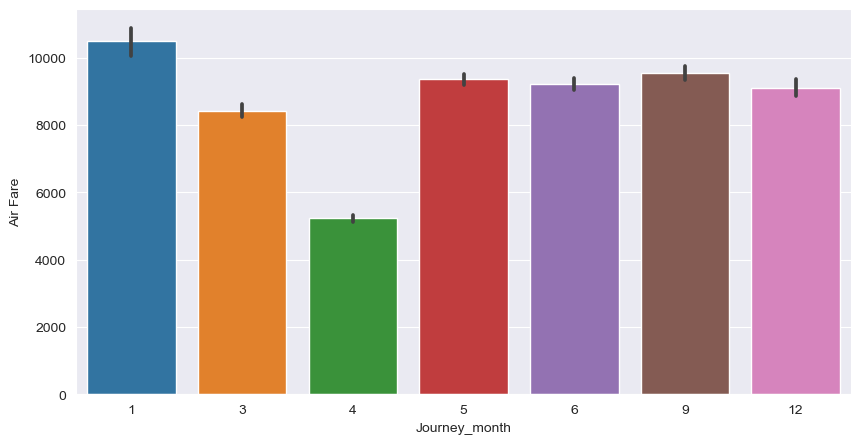

In [240]:
plt.figure(figsize=(10,5))
sns.barplot(df["Journey_month"],df["Price"])
plt.ylabel("Air Fare");

<span style="color:violet"><font size=5> Observation :</font></span><br><br>
<font size=4>Prices are highest in January, while they are the lowest in April</font>

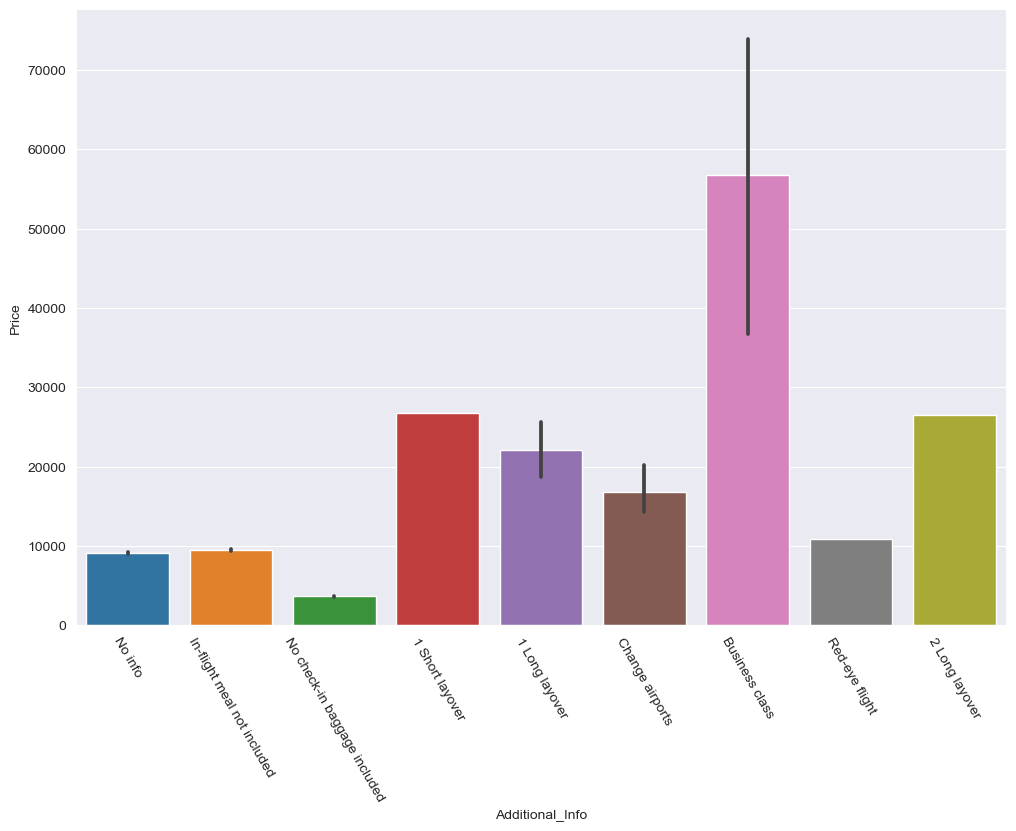

In [241]:
plt.figure(figsize=(12,8))
sns.barplot(df["Additional_Info"],df["Price"])
plt.xticks(rotation = -60);
plt.show()

 <span style="color:violet"><font size=5> Observation :</font></span><br><br>
    <font size=5>Business class has the highest prices</font>

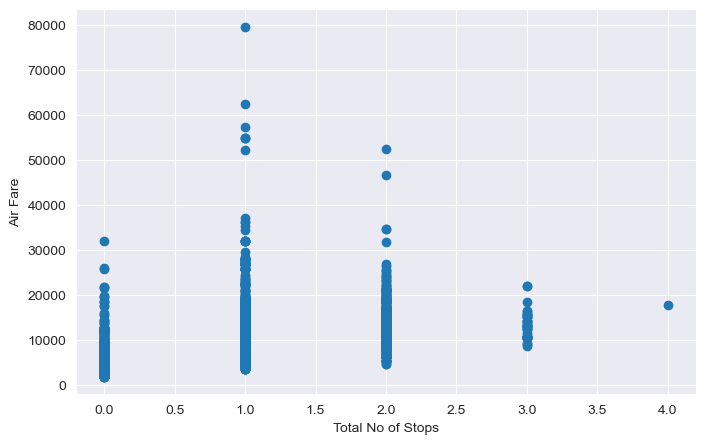

In [242]:
plt.figure(figsize=(8,5))
plt.scatter(df["Total_Stops"],df["Price"]);
plt.xlabel("Total No of Stops")
plt.ylabel("Air Fare");

<span style="color:violet"><font size=5> Observation :</font></span><br><br>
    <font size=5>Prices seem to increase with lower no of stoppages in between</font>

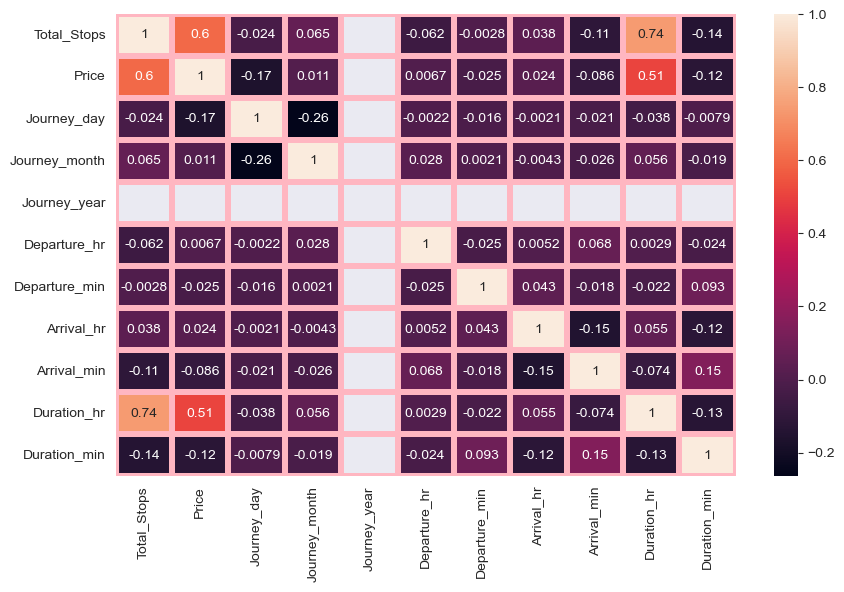

In [244]:
plt.figure(figsize=(10,6))
cor=df.corr()
sns.heatmap(cor,annot=True, linewidth=4, linecolor="lightpink");

<span style="color:violet"><font size=5> Observation :</font></span><br><br>
<font size=4>The trips with only one stop seems to have the highest range of prices</font>

## Data Distribution :

<AxesSubplot:xlabel='Price', ylabel='Density'>

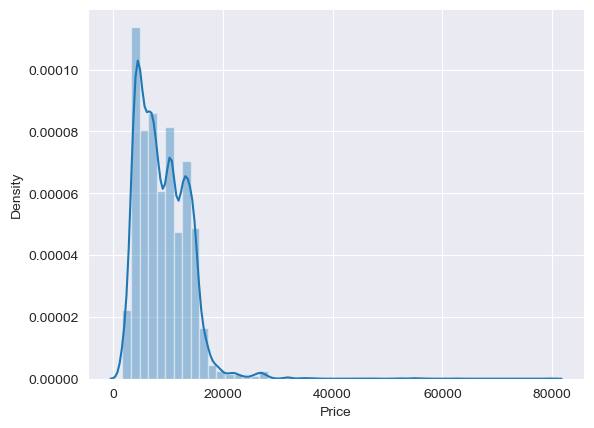

In [246]:
sns.set_style("darkgrid")
sns.distplot(df["Price"])

## Observation :
<font size=4><span style="color:red">The prices are not normally distributed. It is a right skewed distribution.</span></font>

<br><span style="color:salmon"><font size=5>Outlier Detection :-</font></span><br>

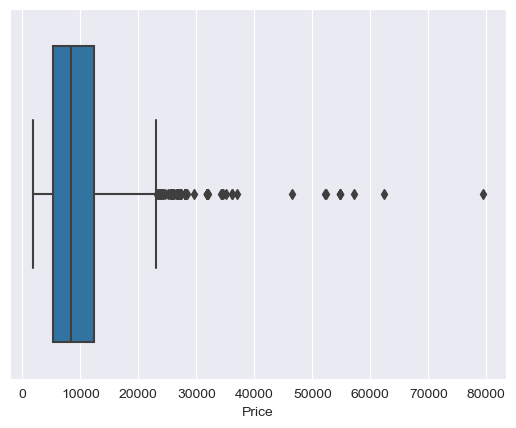

In [247]:
sns.boxplot(df.Price);

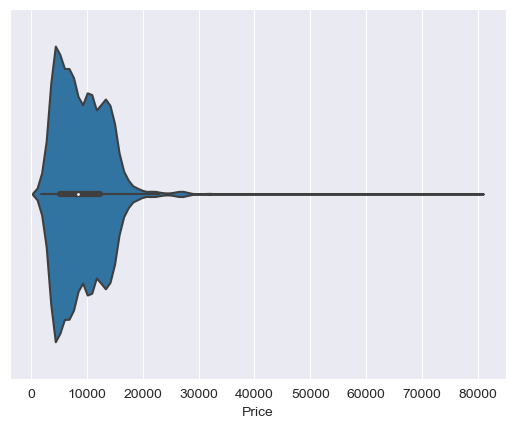

In [248]:
sns.violinplot(df.Price);

In [249]:
df.Price.describe()

count    10681.000000
mean      9086.443123
std       4611.075357
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [250]:
df[df['Price']>40000].shape

(9, 15)

In [251]:
#there were only 9 rows with prices > 40000
df['Price']=np.where(df['Price']>40000 , 40000, df['Price'])

In [252]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [253]:
print("Highest allowed",df['Price'].mean() + 3*df['Price'].std())
print("Lowest allowed",df['Price'].mean() - 3*df['Price'].std())

Highest allowed 22505.743238956864
Lowest allowed -4361.811210120613


In [254]:
# Finding the IQR
percentile25 = df['Price'].quantile(0.25)
percentile75 = df['Price'].quantile(0.75)
iqr=percentile75-percentile25
iqr

7096.0

In [255]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

23017.0
-5367.0


<AxesSubplot:xlabel='Price', ylabel='Density'>

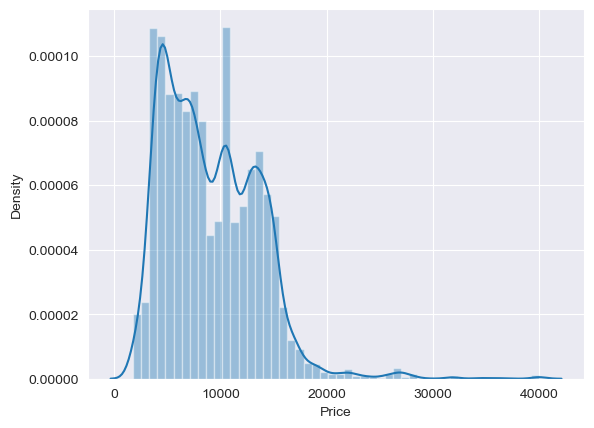

In [256]:
sns.set_style("darkgrid")
sns.distplot(df["Price"])

## Handling Categorical Data

In [257]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [258]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [259]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,1
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,1


In [260]:
# As Additional Info is Nominal Categorical data we will perform OneHotEncoding

Additional_Info = df[["Additional_Info"]]

Additional_Info = pd.get_dummies(Additional_Info, drop_first = True)

Additional_Info.head()

,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [261]:
df_final = pd.concat([df, Airline, Source, Destination,Additional_Info], axis = 1)

In [262]:
df_final.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Departure_hr,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2023,22,...,0,1,0,0,0,0,0,0,1,0
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,2023,5,...,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,2023,9,...,0,0,0,0,0,0,0,0,1,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,2023,18,...,0,0,0,0,0,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,2023,16,...,0,1,0,0,0,0,0,0,1,0


In [263]:
df_final.drop(["Airline", "Source", "Destination","Additional_Info","Journey_year"], axis = 1, inplace = True)

In [264]:
df_final.head()

,Total_Stops,Price,Journey_day,Journey_month,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,22,20,1,10,2,50,...,0,1,0,0,0,0,0,0,1,0
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,1,0,0,0,0,0,0,1,0


## Splitting the dataset into train and test:

In [265]:
X_train,X_test,y_train,y_test=train_test_split(df_final.drop(columns=["Price","Departure_hr","Departure_min","Arrival_hr","Arrival_min","Duration_hr","Duration_min"]),df['Price'],test_size=0.2,random_state=42)

In [266]:
X_train

,Total_Stops,Journey_day,Journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
10611,0,18,5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1034,1,24,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8123,1,27,6,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4779,1,4,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3207,1,24,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,27,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5191,1,5,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5390,1,15,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
860,0,3,3,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [267]:
y_train

10611     4050
1034      5583
8123     10262
4779     12681
3207      6218
         ...  
5734     12242
5191     10844
5390      7670
860       6144
7271      5678
Name: Price, Length: 8544, dtype: int64

In [268]:
X_test

,Total_Stops,Journey_day,Journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
4830,1,24,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3771,1,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1523,1,27,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3393,1,21,5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4169,0,6,12,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9871,0,3,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10063,1,21,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6912,1,6,12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8617,1,6,6,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [269]:
y_test

4830      7476
3771      7927
1523      5963
3393     16289
4169      8016
         ...  
9871      4622
10063     7452
6912      7480
8617     14151
8989     14871
Name: Price, Length: 2137, dtype: int64

<span style="color:yellow"><font size=5.5em><b>Feature Selection :</b></font></span>

In [270]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [271]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [272]:
X_train.columns[var_thres.get_support()]

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight'],
      dtype='object')

In [273]:


def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [274]:
X_train.corr()

,Total_Stops,Journey_day,Journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
Total_Stops,1.000000,-0.021822,0.074043,0.269018,-0.055973,-0.302193,0.208441,0.020563,0.118653,0.008736,...,-0.234051,-0.361771,0.018843,0.018843,0.003905,0.049871,0.102588,-0.200334,-0.019839,-0.013320
Journey_day,-0.021822,1.000000,-0.268672,-0.036373,0.006451,0.009318,-0.027753,-0.026578,0.046105,0.032371,...,0.004899,-0.064060,-0.011883,-0.011883,-0.016807,-0.031451,0.032088,0.036031,-0.037827,-0.011883
Journey_month,0.074043,-0.268672,1.000000,-0.001526,-0.021599,-0.035702,0.056323,-0.025506,0.004822,-0.029221,...,-0.021862,-0.061478,-0.016463,-0.016463,-0.023284,-0.043573,0.040574,-0.025963,-0.017251,-0.016463
Airline_Air India,0.269018,-0.036373,-0.001526,1.000000,-0.061710,-0.216234,-0.333150,-0.010708,-0.156878,-0.015147,...,-0.047916,-0.011148,0.024450,0.024450,-0.006771,0.064713,-0.210524,-0.076824,0.221268,-0.004787
Airline_GoAir,-0.055973,0.006451,-0.021599,-0.061710,1.000000,-0.068149,-0.104997,-0.003375,-0.049442,-0.004774,...,-0.026511,0.084099,-0.001509,-0.001509,-0.002134,-0.003993,-0.066350,-0.024212,0.073365,-0.001509
Airline_IndiGo,-0.302193,0.009318,-0.035702,-0.216234,-0.068149,1.000000,-0.367916,-0.011825,-0.173249,-0.016728,...,0.136740,0.059608,-0.005287,-0.005287,-0.007477,-0.013993,-0.232493,-0.084841,0.257075,-0.005287
Airline_Jet Airways,0.208441,-0.027753,0.056323,-0.333150,-0.104997,-0.367916,1.000000,-0.018219,-0.266922,-0.025772,...,-0.143126,-0.000834,-0.008146,-0.008146,-0.011520,-0.021559,0.584830,-0.130713,-0.495969,-0.008146
Airline_Jet Airways Business,0.020563,-0.026578,-0.025506,-0.010708,-0.003375,-0.011825,-0.018219,1.000000,-0.008579,-0.000828,...,-0.004600,0.023719,-0.000262,-0.000262,0.632344,-0.000693,-0.011513,-0.004201,-0.010761,-0.000262
Airline_Multiple carriers,0.118653,0.046105,0.004822,-0.156878,-0.049442,-0.173249,-0.266922,-0.008579,1.000000,-0.012136,...,-0.067397,-0.179803,-0.003836,-0.003836,-0.005425,-0.010152,-0.096830,-0.061552,0.118863,-0.003836
Airline_Multiple carriers Premium economy,0.008736,0.032371,-0.029221,-0.015147,-0.004774,-0.016728,-0.025772,-0.000828,-0.012136,1.000000,...,-0.006507,-0.017361,-0.000370,-0.000370,-0.000524,-0.000980,-0.016286,-0.005943,0.018008,-0.000370


In [275]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

4

In [276]:
corr_features

{'Additional_Info_No info',
 'Destination_Cochin',
 'Destination_Hyderabad',
 'Destination_Kolkata'}

In [277]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train,y_train)

ExtraTreesRegressor()

In [278]:
print(selection.feature_importances_)

[3.60026649e-01 1.01470112e-01 7.30482546e-02 2.70488638e-02
 1.54686390e-03 1.36750080e-02 1.71213173e-01 3.12490075e-02
 4.38178958e-02 1.16139118e-03 6.67383921e-03 2.86268882e-04
 7.69335465e-03 2.83512436e-05 4.77939271e-04 4.40048525e-03
 7.72698232e-03 8.37742227e-03 4.69741262e-03 9.20128371e-03
 4.45147866e-04 2.29814439e-02 3.48760775e-04 3.23481420e-04
 0.00000000e+00 1.11474068e-03 9.33416030e-02 1.56500234e-04
 7.43948609e-03 2.82789419e-05]


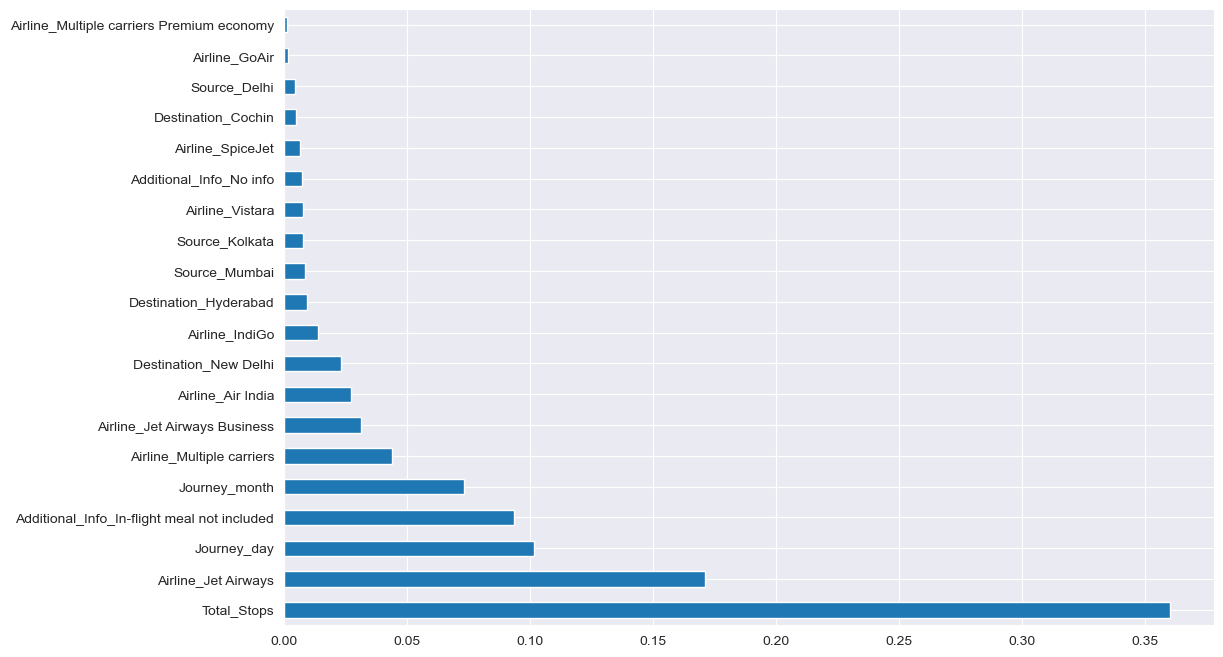

In [279]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


## Linear Regression

In [280]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [281]:
m =lr.coef_
c = lr.intercept_
m, c

(array([  2970.14677587,    -69.30441186,    -90.9466412 ,   1642.1782213 ,
            94.85642816,    273.57194706,   6146.12020925,  29882.05820432,
          3985.15116878,   4314.6732262 ,    -66.12153345,  -2144.75530238,
          2113.37056485,   3626.03556554,    155.34760595,     42.04173562,
           105.33101748,   -709.46374502,     42.04173563,   -709.46374502,
           155.34760595,    406.74338596,   4670.37692766,   4407.37692766,
         -7342.35627949,  -5271.90878663, -12473.62725862,  -9312.95392554,
         -8895.13869079,  -3617.1512993 ]),
 14382.267790130147)

In [282]:
y_pred = m*1.47+c
y_pred

array([18748.38355066, 14280.3903047 , 14248.57622756, 16796.26977544,
       14521.70673953, 14784.41855231, 23417.06449772, 58308.89335048,
       20240.44000823, 20724.83743264, 14285.06913596, 11229.47749564,
       17488.92252046, 19712.54007148, 14610.62877088, 14444.0691415 ,
       14537.10438583, 13339.35608496, 14444.0691415 , 13339.35608496,
       14610.62877088, 14980.18056749, 21247.72187379, 20861.11187379,
        3589.00405928,  6632.56187379, -3953.96428004,   692.22551958,
        1306.41391467,  9065.05538015])

In [283]:
y_predict = lr.predict(X_train)
y_predict

array([ 4933.62063123,  6448.14536357,  8692.09202045, ...,
       11032.21113133,  5686.69127317,  9707.54870619])

In [284]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.6606378729011868
0.6620917670165908


In [285]:
mean_squared_error(y_train, y_predict)

6768047.046165565

In [286]:
mean_absolute_error(y_train, y_predict)

1802.7338053237668

## Decision Tree Regressor

In [287]:
from sklearn.tree import DecisionTreeRegressor
reg_dt = DecisionTreeRegressor()
reg_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [288]:
y_pred = reg_dt.predict(X_test)
y_pred

array([ 7654.        ,  8456.66666667,  6456.89473684, ...,
        8420.61538462, 13963.77419355, 12468.77777778])

In [289]:
reg_dt.score(X_train, y_train)

0.8832761941680632

In [290]:
reg_dt.score(X_test, y_test)

0.8500364856062538

## Random Forest:

In [291]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [292]:
y_pred = reg_rf.predict(X_test)

In [293]:
reg_rf.score(X_train, y_train)

0.8805539533171259

In [294]:
reg_rf.score(X_test, y_test)

0.8561093757633191

In [295]:
import pickle
# Dump the trained Random Forest Regressor with Pickle
rf_pkl_filename = 'models/RandomForest.pkl'
# Open the file to save as pkl file
rf_Model_pkl = open(rf_pkl_filename, 'wb')
pickle.dump(reg_rf, rf_Model_pkl)
# Close the pickle instances
rf_Model_pkl.close()

In [296]:
print(X_test)


       Total_Stops  Journey_day  Journey_month  Airline_Air India  \
4830             1           24              3                  0   
3771             1            4              1                  0   
1523             1           27              3                  0   
3393             1           21              5                  0   
4169             0            6             12                  0   
...            ...          ...            ...                ...   
9871             0            3              6                  0   
10063            1           21              4                  0   
6912             1            6             12                  1   
8617             1            6              6                  0   
8989             1            3              3                  0   

       Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
4830               0               1                    0   
3771               0               0             

In [297]:
print(X_test.columns)

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight'],
      dtype='object')


In [298]:
X_test.shape

(2137, 30)

In [299]:
print(X_test.info)

<bound method DataFrame.info of        Total_Stops  Journey_day  Journey_month  Airline_Air India  \
4830             1           24              3                  0   
3771             1            4              1                  0   
1523             1           27              3                  0   
3393             1           21              5                  0   
4169             0            6             12                  0   
...            ...          ...            ...                ...   
9871             0            3              6                  0   
10063            1           21              4                  0   
6912             1            6             12                  1   
8617             1            6              6                  0   
8989             1            3              3                  0   

       Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
4830               0               1                    0   
3771             